In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os,joblib
print('Libraries imported!')

Libraries imported!


In [3]:
Data_file_path = "https://raw.githubusercontent.com/upflairs-pvt-ltd/1st_june_data_science/master/customer_satisfaction/cust_satisfaction.csv"
df = pd.read_csv(Data_file_path)
df.head()

Gender      Customer Type   Type of Travel     Class  \
0    Male     Loyal Customer  Personal Travel  Eco Plus   
1    Male  disloyal Customer  Business travel  Business   
2  Female     Loyal Customer  Business travel  Business   
3  Female     Loyal Customer  Business travel  Business   
4    Male     Loyal Customer  Business travel  Business   

              satisfaction  Age  Flight Distance  Inflight entertainment  \
0  neutral or dissatisfied   13              460                       5   
1  neutral or dissatisfied   25              235                       1   
2                satisfied   26             1142                       5   
3  neutral or dissatisfied   25              562                       2   
4                satisfied   61              214                       3   

   Baggage handling  Cleanliness  Departure Delay in Minutes  \
0                 4            5                          25   
1                 3            1                           1   
2                 4            5                           0   
3                 3            2                          11   
4                 4            3                           0   

   Arrival Delay in Minutes  
0                      18.0  
1                       6.0  
2                       0.0  
3                       9.0  
4                       0.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [5]:
df.duplicated().sum()

172

In [6]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()


Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [9]:

female = df[df['Gender'] == 'Female']
female['Customer Type'].value_counts()

Customer Type
Loyal Customer       42336
disloyal Customer    10240
Name: count, dtype: int64

In [10]:

male = df[df['Gender'] == 'Male']
male['Customer Type'].value_counts()

Customer Type
Loyal Customer       42326
disloyal Customer     8692
Name: count, dtype: int64

In [11]:
df['Type of Travel'].value_counts()

Type of Travel
Business travel    71465
Personal Travel    32129
Name: count, dtype: int64

In [12]:
df['Class'].value_counts()

Class
Business    49533
Eco         46593
Eco Plus     7468
Name: count, dtype: int64

In [13]:
## classification imbalance or balance dataset
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: count, dtype: int64

In [14]:
label = list(df['Class'].value_counts().keys())
count = list(df['Class'].value_counts().values)


<Axes: >

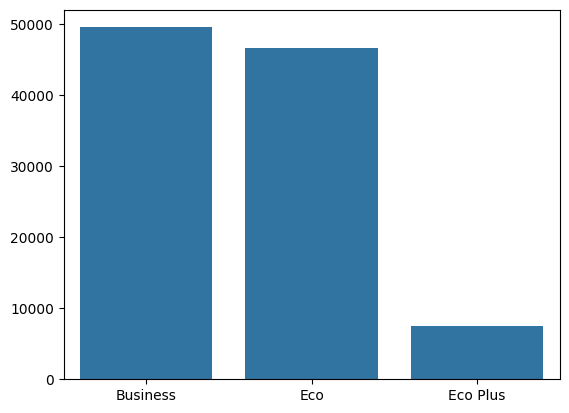

In [15]:
sns.barplot(x=label,y=count)

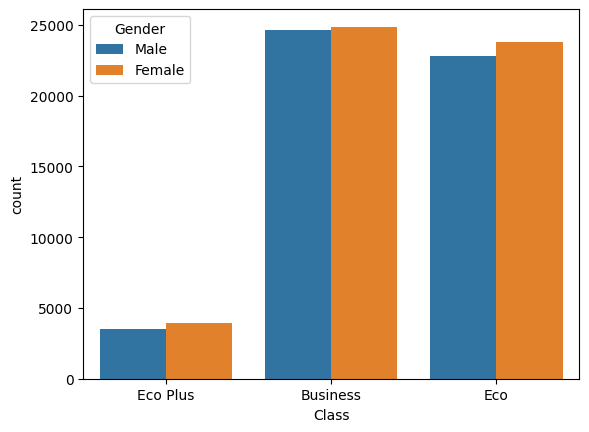

In [16]:
sns.countplot(x='Class',data=df,hue="Gender")
plt.show()

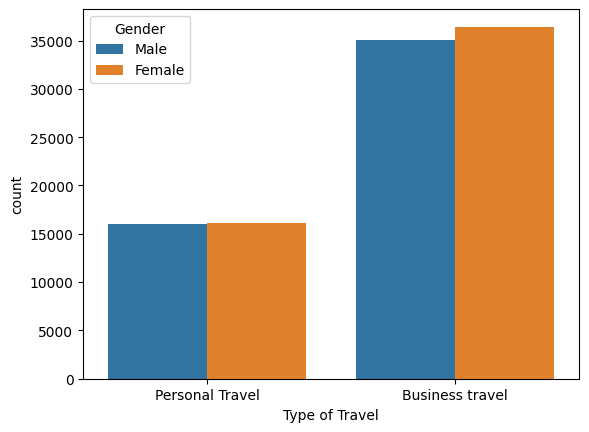

In [17]:
sns.countplot(x='Type of Travel',data=df,hue="Gender")
plt.show()

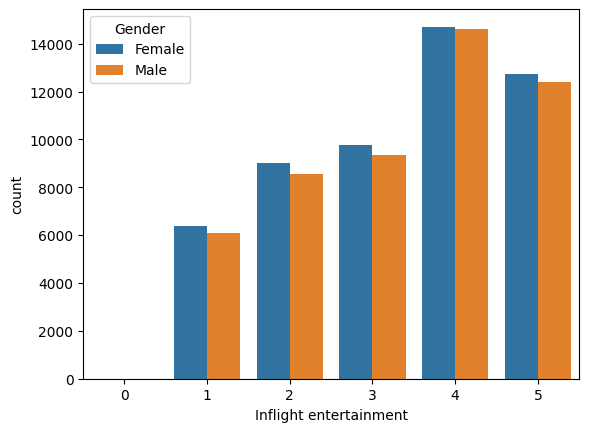

In [18]:
sns.countplot(x='Inflight entertainment',data=df,hue="Gender")
plt.show()

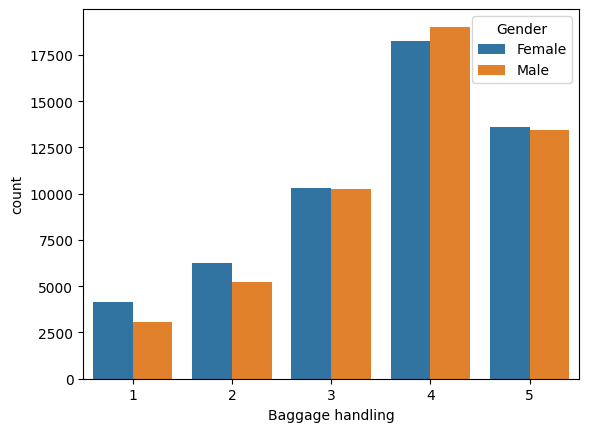

In [19]:
sns.countplot(x='Baggage handling',data=df,hue="Gender")
plt.show()

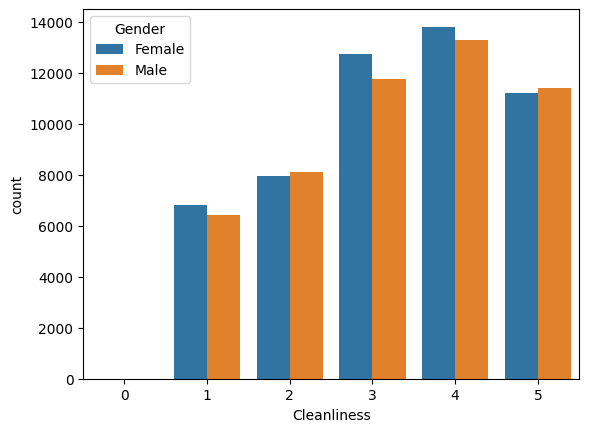

In [20]:
sns.countplot(x='Cleanliness',data=df,hue="Gender")
plt.show()

In [21]:
# from sklearn.preprocessing import OneHotEncoder , LabelEncoder
# onehot encoding representation
df2 = pd.get_dummies(df,drop_first="if_binary").astype(int)


In [22]:
df2.head()

Age  Flight Distance  Inflight entertainment  Baggage handling  \
0   13              460                       5                 4   
1   25              235                       1                 3   
2   26             1142                       5                 4   
3   25              562                       2                 3   
4   61              214                       3                 4   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          25                        18   
1            1                           1                         6   
2            5                           0                         0   
3            2                          11                         9   
4            3                           0                         0   

   Gender_Male  Customer Type_disloyal Customer  \
0            1                                0   
1            1                                1   
2            0                                0   
3            0                                0   
4            1                                0   

   Type of Travel_Personal Travel  Class_Eco  Class_Eco Plus  \
0                               1          0               1   
1                               0          0               0   
2                               0          0               0   
3                               0          0               0   
4                               0          0               0   

   satisfaction_satisfied  
0                       0  
1                       0  
2                       1  
3                       0  
4                       1

In [23]:
## x and y split
x = df2.drop('satisfaction_satisfied',axis='columns')
y = df2[['satisfaction_satisfied']]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [26]:
x_train.head()  # form x variables 

Age  Flight Distance  Inflight entertainment  Baggage handling  \
7137     46             1005                       4                 4   
90514    58             1558                       3                 3   
102880   44             3183                       3                 3   
62284    68              564                       4                 4   
94233    48             2201                       5                 5   

        Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
7137              4                           0                         0   
90514             4                           0                         0   
102880            3                           0                         0   
62284             4                           0                         0   
94233             4                         110                        96   

        Gender_Male  Customer Type_disloyal Customer  \
7137              0                                0   
90514             0                                0   
102880            1                                0   
62284             1                                0   
94233             0                                0   

        Type of Travel_Personal Travel  Class_Eco  Class_Eco Plus  
7137                                 0          0               0  
90514                                0          0               0  
102880                               0          0               0  
62284                                1          1               0  
94233                                0          0               0

In [27]:
x_train.columns

Index(['Age', 'Flight Distance', 'Inflight entertainment', 'Baggage handling',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')

In [28]:
len(x_train.columns)

12

In [42]:
y_train

satisfaction_satisfied
7137                         1
90514                        1
102880                       1
62284                        0
94233                        1
...                        ...
32006                        0
85144                        1
78826                        1
25660                        1
44800                        0

[82875 rows x 1 columns]

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
## model or algorithm  training
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()

In [31]:
lgr.fit(x_train,y_train)  # training algorithm 

LogisticRegression()

In [32]:
print("Training score : ",lgr.score(x_train,y_train)*100)
print("Testing Score : ",lgr.score(x_test,y_test)*100)


Training score :  79.61508295625943
Testing Score :  79.83976060620687


In [33]:
## Prediction 

pred = lgr.predict(x_test)

In [34]:
y_test['prediction'] = pred 

In [35]:
y_test.head(40)

satisfaction_satisfied  prediction
6249                         0           0
60939                        0           0
56724                        0           0
37576                        0           0
12087                        1           1
82279                        1           1
45316                        1           1
12417                        0           0
24794                        1           1
20326                        0           0
8152                         1           0
59400                        0           0
100836                       1           0
1046                         1           1
2168                         0           0
75485                        1           1
91495                        1           1
77224                        1           1
80436                        1           1
39227                        1           1
68172                        1           1
48533                        1           1
33681                        1           1
93481                        0           1
34762                        0           0
86199                        1           0
101189                       0           0
40440                        1           0
44886                        0           0
83130                        0           0
91159                        0           0
75568                        0           0
3473                         0           0
98904                        0           0
79974                        1           1
58803                        1           1
60291                        0           0
101609                       0           1
16621                        0           0
25406                        1           0

In [36]:
from sklearn.metrics import confusion_matrix,classification_report 

In [37]:
#confusion_matrix(ACTUAL_VALUE  , PREDICTED_VALUE) 
confusion_matrix(y_test['satisfaction_satisfied'],y_test['prediction'])

array([[9603, 2039],
       [2138, 6939]], dtype=int64)

In [38]:
(9636+6860)/(9636+6860+2059+2164) 
#79.6177421690236 

0.796177421690236

In [39]:
print(classification_report(y_test['satisfaction_satisfied'],y_test['prediction']))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     11642
           1       0.77      0.76      0.77      9077

    accuracy                           0.80     20719
   macro avg       0.80      0.79      0.80     20719
weighted avg       0.80      0.80      0.80     20719



In [40]:
import joblib

In [41]:
joblib.dump(lgr,'logistic_regression.lb')

['logistic_regression.lb']